In [47]:
from matplotlib import gridspec
#여러개의 그래프를 한번에 보기 위한 함수 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [48]:
def crop_center(image):
    shape = image.shape
    #shape = [1, width, height, channel]
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2
    image = tf.image.crop_to_bounding_box(image, offset_y, offset_x, new_shape, new_shape)
    # 이미지 사이즈를 위해 중간부분 바운딩 박스를 만들어 거기 부분만 출력하게 함
    # 사이즈를 줄일 때 필요한 부분만 줄이기 위함
    # tf.image.crop_top_bounding_box(image, offset_height, offset_width, target_height, target_wight)
    return image

def load_image(image_name, image_size, preserve_aspect_ratio=True):
    # preserve_aspect_ratio -> 가로세로 비율의 크기를 고정시키는걸 의미
    
    img = plt.imread(image_name).astype(np.float32)[np.newaxis, ...]
    # batch 사이즈를 추가 shape = [1, width, height, channel]
    
    if img.max() > 1.0:
        img = img / 255.
        
    img = crop_center(img)
    # 중간 사진 빼고 자르기 
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

def show_n(images, titles=('',)):
    n = len(images)
    image_size = [image.shape[1] for image in images]
    w = (image_size[0] * 6) // 320
    plt.figure(figsize=(w * n, w))
    grid = gridspec.GridSpec(1, n, width_ratios = image_size)
    #matplotlib.gridspec.GridSpec -> 여러개의 그래프를 한번에 보기 위한 함수 
    for i in range(n):
        plt.subplot(grid[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i] if len(titles) > i else '')
    plt.show()

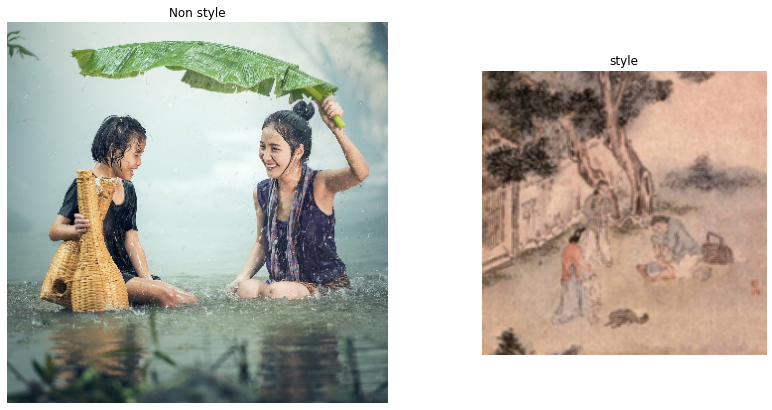

In [49]:
content_image = 'woman.jpg'
style_image = '촌가여행.jpg'
output_size = 384

content_image_size = (output_size, output_size)
style_image_size = (256, 256)

content = load_image(content_image, content_image_size)
style = load_image(style_image, style_image_size)
style =  tf.nn.avg_pool(style, ksize=[3,3], strides=[1, 1], padding='SAME')
# average pooling을 통해 style image 의 특징을 추출함
show_n([content, style], ['Non style', 'style'])

In [50]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

output = hub_module(tf.constant(content), tf.constant(style))
# tf.constant -> 배열을 만들어줌 
# 이미지를 array, type을 출력함
stylized_image= output[0]

2022-03-29 11:47:44.319783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


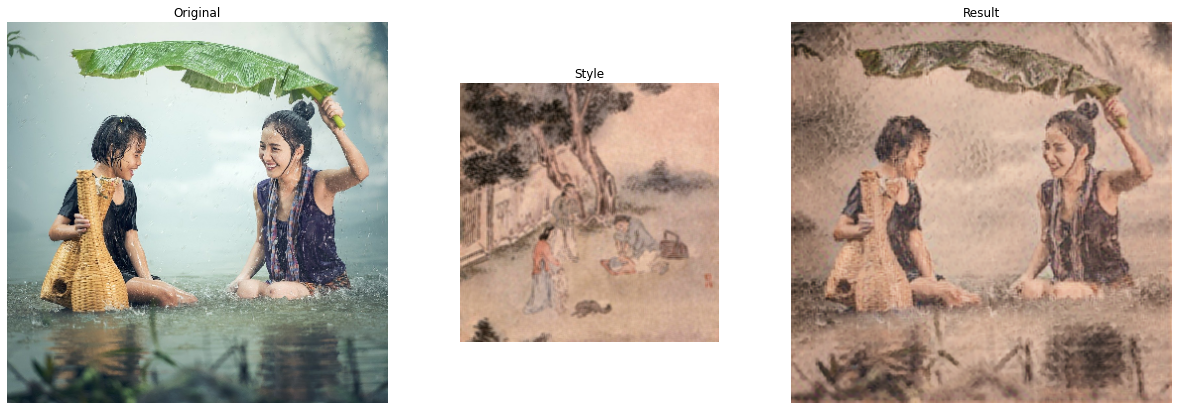

In [51]:
show_n([content, style, stylized_image], titles=['Original', 'Style', 'Result'])
# 이미지 출처 https://gongu.copyright.or.kr/gongu/wrt/wrt/view.do?wrtSn=13216911&menuNo=200018